# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
city_list=[]
print("Beginning Data Retrieval  ")   
print("-----------------------------")

record = 1
set_ = 1


for city in cities:
    if (record % 50 == 0 and record >= 50):
        set_ += 1
        record = 1
    print(f"Processing Record {record} of Set {set_} | {city}")
    record += 1
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_name=weather_json["name"]
        city_lat=weather_json["coord"]["lat"]
        city_lon=weather_json["coord"]["lon"]
        city_temp=weather_json["main"]["temp_max"]
        city_humidity=weather_json["main"]["humidity"]
        city_wind=weather_json["wind"]["speed"]
        city_clouds=weather_json["clouds"]["all"]
        city_country=weather_json["sys"]["country"]
        city_date=weather_json["dt"]
        city_list.append({"City": city_name, 
                              "Lat": city_lat, 
                              "Lng": city_lon, 
                              "Max Temp": city_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date
                            })
    except:
        print("City not found. Skipping...")
        pass
# -----------------------------
# Data Retrieval Complete      
# -----------------------------

Beginning Data Retrieval  
-----------------------------
Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | vardo
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | marcona
City not found. Skipping...
Processing Record 8 of Set 1 | tuatapere
Processing Record 9 of Set 1 | road town
Processing Record 10 of Set 1 | grand forks
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | samarai
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set

Processing Record 38 of Set 4 | haines junction
Processing Record 39 of Set 4 | maraa
Processing Record 40 of Set 4 | mamakan
Processing Record 41 of Set 4 | mahina
Processing Record 42 of Set 4 | aykhal
Processing Record 43 of Set 4 | taoudenni
Processing Record 44 of Set 4 | novoomskiy
Processing Record 45 of Set 4 | lazaro cardenas
Processing Record 46 of Set 4 | san marcos
Processing Record 47 of Set 4 | babanusah
City not found. Skipping...
Processing Record 48 of Set 4 | port elizabeth
Processing Record 49 of Set 4 | bethel
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | marrakesh
Processing Record 3 of Set 5 | tarakan
Processing Record 4 of Set 5 | sabang
Processing Record 5 of Set 5 | poya
Processing Record 6 of Set 5 | arrecife
Processing Record 7 of Set 5 | tiznit
Processing Record 8 of Set 5 | atuona
Processing Record 9 of Set 5 | samarinda
Processing Record 10 of Set 5 | torbay
Processing Record 11 of Set 5 | te anau
Processing Record 12 of Set 5 |

Processing Record 32 of Set 8 | omboue
Processing Record 33 of Set 8 | bossangoa
Processing Record 34 of Set 8 | arucas
Processing Record 35 of Set 8 | sholokhove
Processing Record 36 of Set 8 | bantogon
Processing Record 37 of Set 8 | manado
Processing Record 38 of Set 8 | changping
Processing Record 39 of Set 8 | waterloo
Processing Record 40 of Set 8 | akhmeta
Processing Record 41 of Set 8 | makakilo city
Processing Record 42 of Set 8 | grand gaube
Processing Record 43 of Set 8 | novyy buh
Processing Record 44 of Set 8 | saint george
Processing Record 45 of Set 8 | inhambane
Processing Record 46 of Set 8 | san ramon
Processing Record 47 of Set 8 | balimo
City not found. Skipping...
Processing Record 48 of Set 8 | khani
Processing Record 49 of Set 8 | sabinas hidalgo
Processing Record 1 of Set 9 | ketchenery
City not found. Skipping...
Processing Record 2 of Set 9 | slave lake
Processing Record 3 of Set 9 | san jose
Processing Record 4 of Set 9 | vila franca do campo
Processing Recor

Processing Record 25 of Set 12 | andarab
City not found. Skipping...
Processing Record 26 of Set 12 | yulara
Processing Record 27 of Set 12 | itaituba
Processing Record 28 of Set 12 | washington
Processing Record 29 of Set 12 | chitral
Processing Record 30 of Set 12 | belaya gora
Processing Record 31 of Set 12 | ust-ishim
Processing Record 32 of Set 12 | wewak
Processing Record 33 of Set 12 | north shore
Processing Record 34 of Set 12 | campbell river
Processing Record 35 of Set 12 | cullman
Processing Record 36 of Set 12 | yambio
Processing Record 37 of Set 12 | acarau
Processing Record 38 of Set 12 | mandalgovi
Processing Record 39 of Set 12 | moroni
Processing Record 40 of Set 12 | karakose
City not found. Skipping...
Processing Record 41 of Set 12 | ornskoldsvik
Processing Record 42 of Set 12 | bandar
Processing Record 43 of Set 12 | lavrentiya
Processing Record 44 of Set 12 | yialos
City not found. Skipping...
Processing Record 45 of Set 12 | cervo
Processing Record 46 of Set 12 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
citydf=pd.DataFrame(city_list)
citydf.to_csv('weather.csv', index=False)
citydf.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lüderitz,-26.6481,15.1594,66.22,94,4,6.71,NA,1671047792
1,Klaksvík,62.2266,-6.5890,34.72,67,100,28.50,FO,1671047792
2,Vardø,70.3705,31.1107,17.58,79,75,16.11,NO,1671047792
3,Arraial do Cabo,-22.9661,-42.0278,78.76,57,40,12.66,BR,1671047793
4,Bredasdorp,-34.5322,20.0403,69.85,85,47,4.23,ZA,1671047793


In [5]:
citydf.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,5.370000e+02
mean,20.354840,17.393996,49.617709,73.731844,60.417132,8.063035,1.671048e+09
std,33.876079,94.520820,33.079548,21.497977,39.808088,6.054854,8.816236e+01
min,-54.800000,-175.200000,-61.080000,9.000000,0.000000,0.000000,1.671048e+09
25%,-7.304400,-67.583300,28.960000,62.000000,20.000000,3.510000,1.671048e+09
50%,25.900000,21.704900,60.420000,79.000000,75.000000,6.910000,1.671048e+09
75%,49.783400,104.043900,76.330000,91.000000,100.000000,10.510000,1.671048e+09
max,78.218600,176.633300,98.190000,100.000000,100.000000,32.590000,1.671048e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

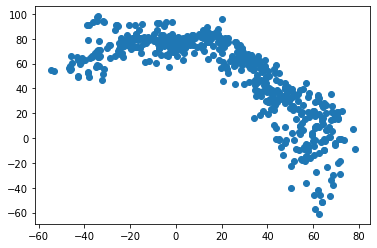

In [6]:
plt.scatter(citydf['Lat'],citydf['Max Temp'])

## Latitude vs. Humidity Plot

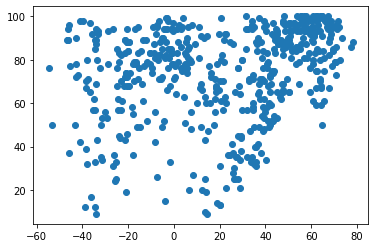

In [7]:
plt.scatter(citydf['Lat'],citydf['Humidity'])

## Latitude vs. Cloudiness Plot

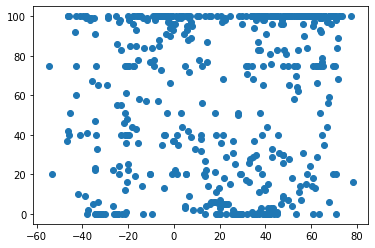

In [8]:
plt.scatter(citydf['Lat'],citydf['Cloudiness'])

## Latitude vs. Wind Speed Plot

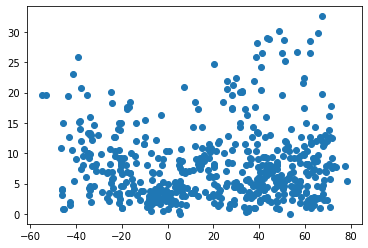

In [9]:
plt.scatter(citydf['Lat'],citydf['Wind Speed'])

## Linear Regression

In [10]:
nohem = citydf.loc[citydf["Lat"] >= 0]
sohem = citydf.loc[citydf["Lat"] < 0]

In [11]:
from sklearn.linear_model import LinearRegression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

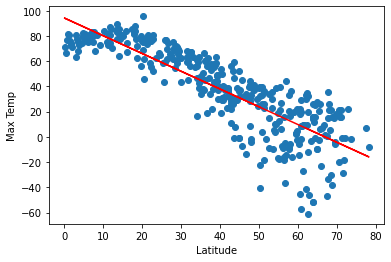

In [12]:
X = nohem['Lat'].values.reshape(-1, 1)  
Y = nohem['Max Temp'].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

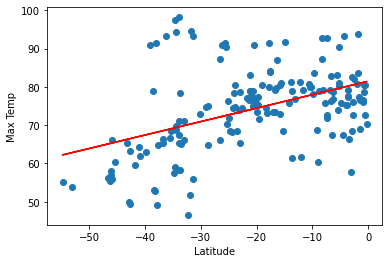

In [13]:
X = sohem['Lat'].values.reshape(-1, 1)  
Y = sohem['Max Temp'].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

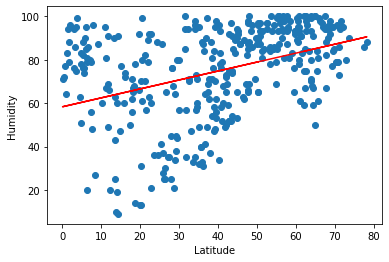

In [14]:
X = nohem['Lat'].values.reshape(-1, 1)  
Y = nohem['Humidity'].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

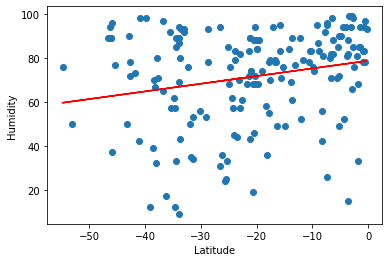

In [15]:
X = sohem['Lat'].values.reshape(-1, 1)  
Y = sohem['Humidity'].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

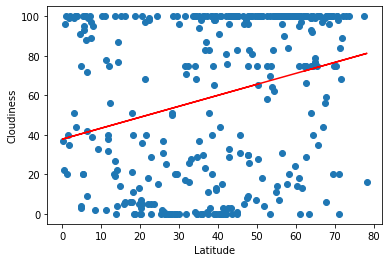

In [16]:
X = nohem['Lat'].values.reshape(-1, 1)  
Y = nohem['Cloudiness'].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

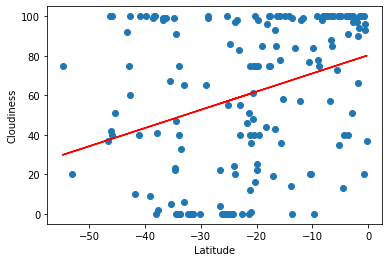

In [17]:
X = sohem['Lat'].values.reshape(-1, 1)  
Y = sohem['Cloudiness'].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

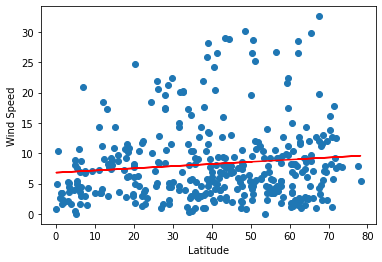

In [18]:
X = nohem['Lat'].values.reshape(-1, 1)  
Y = nohem['Wind Speed'].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

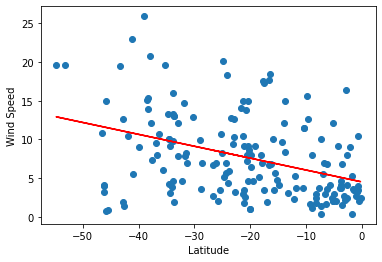

In [19]:
X = sohem['Lat'].values.reshape(-1, 1)  
Y = sohem['Wind Speed'].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

In [20]:
sohem.corr()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
Lat,1.000000,-0.047247,0.447723,0.221044,0.331333,-0.392406,0.261978
Lng,-0.047247,1.000000,-0.437975,0.322516,0.097585,-0.326995,-0.008187
Max Temp,0.447723,-0.437975,1.000000,-0.449811,-0.064728,-0.039876,0.238293
Humidity,0.221044,0.322516,-0.449811,1.000000,0.327382,-0.352256,-0.130667
Cloudiness,0.331333,0.097585,-0.064728,0.327382,1.000000,-0.216131,0.067344
Wind Speed,-0.392406,-0.326995,-0.039876,-0.352256,-0.216131,1.000000,-0.174413
Date,0.261978,-0.008187,0.238293,-0.130667,0.067344,-0.174413,1.000000


In [21]:
nohem.corr()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
Lat,1.000000,-0.040992,-0.844376,0.389378,0.275736,0.113044,0.021801
Lng,-0.040992,1.000000,-0.273382,0.124637,0.077548,-0.093475,0.116675
Max Temp,-0.844376,-0.273382,1.000000,-0.446990,-0.217735,0.058435,-0.102544
Humidity,0.389378,0.124637,-0.446990,1.000000,0.507774,-0.075062,0.004696
Cloudiness,0.275736,0.077548,-0.217735,0.507774,1.000000,0.101053,0.097247
Wind Speed,0.113044,-0.093475,0.058435,-0.075062,0.101053,1.000000,-0.068672
Date,0.021801,0.116675,-0.102544,0.004696,0.097247,-0.068672,1.000000
